In [122]:
import pandas as pd
import numpy as np
import catboost
from catboost import CatBoostRegressor
from algolab import API
from datetime import datetime
from config import *
import pandas as pd, numpy as np, json, os

import yfinance as yf

In [123]:
son=pd.read_excel("./excel/FiyatPenceresi.Xlsx")
endeks=son.iloc[-1,:]
son=son.iloc[:-1,:]
hisseler=son["Kod"].values
hisseler=np.array(hisseler)
for i in range(len(hisseler)):
    hisseler[i]=hisseler[i]+".IS"

In [124]:
df=pd.DataFrame()
for hisse in hisseler:
    hisse_verileri = yf.download(hisse,start="2018-01-01")  # Örnek tarih aralığı
    hisse_kapanis = hisse_verileri[['High','Low','Open','Close','Volume']]
    hisse_kapanis["Hisse"]=hisse
    hisse_kapanis.loc[hisse_kapanis["Close"] > hisse_kapanis["High"], "High"] = hisse_kapanis["Close"]
    hisse_kapanis.loc[hisse_kapanis["Close"] < hisse_kapanis["Low"], "Low"] = hisse_kapanis["Close"]

    df=pd.concat([df,hisse_kapanis],axis=0)
df

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

,High,Low,Open,Close,Volume,Hisse
Date,,,,,,
2023-06-15,27.500000,27.500000,27.500000,27.500000,262214.0,A1CAP.IS
2023-06-16,30.240000,30.240000,30.240000,30.240000,1169499.0,A1CAP.IS
2023-06-20,31.100000,29.940001,31.000000,29.940001,8064437.0,A1CAP.IS
2023-06-21,26.959999,26.959999,26.959999,26.959999,2147415.0,A1CAP.IS
2023-06-22,27.620001,25.500000,25.620001,25.940001,71898180.0,A1CAP.IS
...,...,...,...,...,...,...
2024-05-27,7.470000,7.110000,7.110000,7.170000,2725387.0,ZRGYO.IS
2024-05-28,7.270000,7.040000,7.170000,7.220000,1321881.0,ZRGYO.IS
2024-05-29,7.610000,7.220000,7.220000,7.390000,4984541.0,ZRGYO.IS


In [126]:
data=df.copy()

In [65]:
df=data

In [127]:
df["Close"]=np.round(df["Close"],2)
df["High"]=np.round(df["High"],2)
df["Low"]=np.round(df["Low"],2)
df["Open"]=np.round(df["Open"],2)

In [128]:
df["Volume"]=df["Volume"]*df["Close"]

In [129]:
df.columns=['High', 'Low', 'Open', 'Adj Close', 'Volume', 'Hisse']

In [131]:
canlı=pd.read_excel("./excel/FiyatPenceresi.Xlsx")
endeks=canlı.iloc[-1,:]
canlı=canlı.iloc[:-1,:]
canlı=canlı[["Yks","Dşk","Açl.Gün","Son.Fyt","Hcm","Kod","Lot"]]
canlı.columns=['High', 'Low', 'Open', 'Adj Close', 'Volume', 'Hisse',"Lot"]
canlı.index = pd.to_datetime(['2024-05-30'] * len(canlı))
canlı = canlı[~canlı['Hisse'].isin(['IDEAS', 'ISATR', 'ISKUR', 'ITTFH'])]
canlı

,High,Low,Open,Adj Close,Volume,Hisse,Lot
2024-05-30,"27,90","27,20","27,56","27,50",27.624.263,A1CAP,1.001.930
2024-05-30,"147,00","144,10","145,00","145,20",12.552.169,ACSEL,86.068
2024-05-30,"646,50","628,00","638,50","643,50",101.430.079,ADEL,159.108
2024-05-30,"2,35","2,25","2,33","2,28",76.546.371,ADESE,33.326.323
2024-05-30,"27,00","25,98","26,62","26,88",34.772.052,ADGYO,1.306.334
...,...,...,...,...,...,...,...
2024-05-30,"7,45","6,87","7,15","7,06",49.800.755,YYAPI,6.987.649
2024-05-30,"13,06","12,51","12,90","12,64",86.308.802,YYLGD,6.746.894
2024-05-30,"12,14","11,53","11,76","11,70",48.973.834,ZEDUR,4.141.020
2024-05-30,"5,81","5,52","5,75","5,62",982.460.645,ZOREN,173.372.800


In [132]:
canlı["Lot"]=canlı["Lot"].astype("string")

In [133]:
for i in range(len(canlı)):
    if len(canlı.iloc[i, -1]) <= 7:
        if '.' in canlı.iloc[i, -1]:
            parts = canlı.iloc[i, -1].split('.')
            decimal_part = parts[1]
            if len(decimal_part) == 1:
                decimal_part += '00'
            elif len(decimal_part) == 2:
                decimal_part += '0'
            elif len(decimal_part) == 3:
                canlı.iloc[i, -1] = parts[0] + decimal_part[:2]
            canlı.iloc[i, -1] = parts[0] + decimal_part


In [134]:
df = df[~df['Hisse'].isin(['ISATR.IS', 'ISKUR.IS'])]

In [135]:
kod=canlı["Hisse"].unique()
for i in range(len(kod)):
    kod[i]=kod[i]+".IS"

In [136]:
canlı["Hisse"]=kod

In [137]:
canlı["High"]=canlı["High"].str.replace(",",".")
canlı["Low"]=canlı["Low"].str.replace(",",".")
canlı["Open"]=canlı["Open"].str.replace(",",".")
canlı["Adj Close"]=canlı["Adj Close"].str.replace(",",".")
canlı["Lot"]=canlı["Lot"].astype(str).str.replace(".", "")
canlı[["High","Low","Open","Adj Close","Lot"]]=canlı[["High","Low","Open","Adj Close","Lot"]].astype(float)
canlı["Volume"]=canlı["Lot"]*canlı["Adj Close"]
canlı

,High,Low,Open,Adj Close,Volume,Hisse,Lot
2024-05-30,27.90,27.20,27.56,27.50,2.755308e+07,A1CAP.IS,1001930.0
2024-05-30,147.00,144.10,145.00,145.20,1.249707e+07,ACSEL.IS,86068.0
2024-05-30,646.50,628.00,638.50,643.50,1.023860e+08,ADEL.IS,159108.0
2024-05-30,2.35,2.25,2.33,2.28,7.598402e+07,ADESE.IS,33326323.0
2024-05-30,27.00,25.98,26.62,26.88,3.511426e+07,ADGYO.IS,1306334.0
...,...,...,...,...,...,...,...
2024-05-30,7.45,6.87,7.15,7.06,4.933280e+07,YYAPI.IS,6987649.0
2024-05-30,13.06,12.51,12.90,12.64,8.528074e+07,YYLGD.IS,6746894.0
2024-05-30,12.14,11.53,11.76,11.70,4.844993e+07,ZEDUR.IS,4141020.0
2024-05-30,5.81,5.52,5.75,5.62,9.743551e+08,ZOREN.IS,173372800.0


In [138]:
df["High"].loc["2024-05-31"]=canlı["High"].values
df["Low"].loc["2024-05-31"]=canlı["Low"].values
df["Open"].loc["2024-05-31"]=canlı["Open"].values
df["Adj Close"].loc["2024-05-31"]=canlı["Adj Close"].values
df["Volume"].loc["2024-05-31"]=canlı["Volume"].values

C:\Users\Bora\AppData\Local\Temp\ipykernel_4264\2269395962.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["High"].loc["2024-05-31"]=canlı["High"].values
C:\Users\Bora\AppData\Local\Temp\ipykernel_4264\2269395962.py:1: SettingWithCopy

In [139]:
df["Kademe"] = np.where(df["Adj Close"] < 20, 0.01,
                np.where(df["Adj Close"] < 50, 0.02,
                    np.where(df["Adj Close"] < 100, 0.05,
                        np.where(df["Adj Close"] < 250, 0.1,
                            np.where(df["Adj Close"] < 500, 0.25,
                                np.where(df["Adj Close"] < 1000, 0.5,
                                    np.where(df["Adj Close"] < 2500, 1, 2.5)
                                )  # Buradaki parantez eksikti.
                            )
                        )
                    )
                )
            )


C:\Users\Bora\AppData\Local\Temp\ipykernel_4264\1136949090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Kademe"] = np.where(df["Adj Close"] < 20, 0.01,


In [140]:
import math
def yuvarla_asagi(row):
    fiyat = row['Adj Close']
    kadem = row['Kademe']
    return math.floor(fiyat * 1.1 / kadem) * kadem

df["Tavan"]=df.apply(yuvarla_asagi, axis=1)
df["Tavan"]=np.round(df["Tavan"],2)

C:\Users\Bora\AppData\Local\Temp\ipykernel_4264\1680495506.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Tavan"]=df.apply(yuvarla_asagi, axis=1)
C:\Users\Bora\AppData\Local\Temp\ipykernel_4264\1680495506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Tavan"]=np.round(df["Tavan"],2)


In [141]:
df["Tavan Kontrol"]=np.where(((df["Adj Close"]/df["Tavan"].shift(1))==1),1,0)

C:\Users\Bora\AppData\Local\Temp\ipykernel_4264\2428692899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Tavan Kontrol"]=np.where(((df["Adj Close"]/df["Tavan"].shift(1))==1),1,0)


In [142]:
df=df.drop(["Kademe","Tavan"],axis=1)

In [143]:
import pandas_ta as ta

df["SMA 5"]=df["Adj Close"].rolling(5).mean()
df["SMA 10"]=df["Adj Close"].rolling(5).mean()
df["SMA 200"]=df["Adj Close"].rolling(5).mean()

# RSI
df["RSI"] = ta.rsi(df["Adj Close"],14)

# Bağıl Hacim
df["Bağıl Hacim"] = df["Volume"] / df["Volume"].rolling(10).mean()



# ADX, DMI, Aroon
adx_data = ta.adx(df["High"], df["Low"], df["Adj Close"], 14)
df["ADX"], df["DMIP"], df["DMIN"] = adx_data.iloc[:, 0], adx_data.iloc[:, 1], adx_data.iloc[:, 2]




def calculate_stoch_rsi(data, rsi_period=14, stochastic_period=14, k_period=3, d_period=3):
    rsi = ta.rsi(data["Adj Close"], rsi_period)
    stoch_rsi = (rsi - rsi.rolling(window=stochastic_period).min()) / (rsi.rolling(window=stochastic_period).max() - rsi.rolling(window=stochastic_period).min())
    stoch_rsi_k = stoch_rsi.rolling(window=k_period).mean() * 100
    stoch_rsi_d = stoch_rsi_k.rolling(window=d_period).mean()
    data['StochRSI_%K'] = stoch_rsi_k
    data['StochRSI_%D'] = stoch_rsi_d
    return data

df = calculate_stoch_rsi(df)


def calculate_macd(data, short_period=12, long_period=26, signal_period=9):
    data['EMA_12'] = ta.ema(data['Adj Close'], short_period)
    data['EMA_26'] = ta.ema(data['Adj Close'], long_period)
    data['MACD'] = data['EMA_12'] - data['EMA_26']
    data['Signal_Line'] = ta.ema(data['MACD'], signal_period)
    data['MACD_above_Signal'] = (data['MACD'] > data['Signal_Line']).astype(float)
    return data

df = calculate_macd(df)



# Diğer Göstergeler
df["DD"] = ((df["Adj Close"] / df["High"]) - 1) * 100
df["Range"] = ((df["High"] - df["Low"]) / df["Adj Close"]) * 100

df["MOM"] = ta.mom(df["Adj Close"], 10)



df["Driehaus Momentum"] = ((df["Bağıl Hacim"] > 2) & (df["RSI"] > 50) & (df["MOM"] > 1) & (df["Adj Close"] > df["SMA 5"]) & (df["Adj Close"] > df["SMA 10"]) & (df["Adj Close"] > df["SMA 200"])).astype(int)
df["MACD Yukarı Kesen"] = ((df["Bağıl Hacim"] > 1.5) & (df["MACD"] > 0) & (df["MACD_above_Signal"] == 1)).astype(int)
df["ADXDMI20"] = ((df["Bağıl Hacim"] > 1.3) & (df["ADX"] > 20) & (df["DMIP"] > df["DMIN"])).astype(int)
df["MACD+Stoch"] = ((df["Bağıl Hacim"] > 1.3) & (df["StochRSI_%K"] > df["StochRSI_%D"]) & (df["MACD_above_Signal"] == 1)).astype(int)




In [144]:
df["Return"]=100*((df["Open"]/df["Adj Close"].shift(2))-1)
df["Return"]=df["Return"].shift(-2)
df["Gerçek Return"]=100*((df["Open"]/df["Open"].shift(1))-1)
df["Gerçek Return"]=df["Gerçek Return"].shift(-2)
df["Date"]=pd.to_datetime(df.index)

In [145]:
df=df[['High', 'Low', 'Open', 'Adj Close', 'Volume', 'Hisse', 'Bağıl Hacim', 'RSI','Driehaus Momentum', 'MACD Yukarı Kesen', 'ADXDMI20',
       'MACD+Stoch','DD','Range','Return',"Gerçek Return","Tavan Kontrol"]]

In [146]:
endeks=endeks["Son.Fyt"]
endeks=endeks.replace(",",".")
endeks=float(endeks)

In [147]:
index=yf.download(tickers="XU100.IS",start="2000-01-01")
df["Endeks"]=index["Adj Close"]
df["Endeks Return"]=100*((df["Endeks"]/df["Endeks"].shift(1))-1)
df["Return Lag"]=((df["Adj Close"]/df["Adj Close"].shift(1))-1)*100
endeks_son=((endeks/index["Adj Close"].iloc[-2])-1)*100
df["Endeks Return"].loc["2024-05-30"]=endeks_son
df


[*********************100%%**********************]  1 of 1 completed
C:\Users\Bora\AppData\Local\Temp\ipykernel_4264\3723056622.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["Endeks Return"].loc["2024-05-30"]=endeks_son
C:\Users\Bor

,High,Low,Open,Adj Close,Volume,Hisse,Bağıl Hacim,RSI,Driehaus Momentum,MACD Yukarı Kesen,ADXDMI20,MACD+Stoch,DD,Range,Return,Gerçek Return,Tavan Kontrol,Endeks,Endeks Return,Return Lag
Date,,,,,,,,,,,,,,,,,,,,
2023-06-15,27.50,27.50,27.50,27.50,7.210885e+06,A1CAP.IS,NaN,NaN,0,0,0,0,0.000000,0.000000,12.727273,2.513228,0,5495.500000,NaN,NaN
2023-06-16,30.24,30.24,30.24,30.24,3.536565e+07,A1CAP.IS,NaN,NaN,0,0,0,0,0.000000,0.000000,-10.846561,-13.032258,1,5475.500000,-0.363934,9.963636
2023-06-20,31.10,29.94,31.00,29.94,2.414492e+08,A1CAP.IS,NaN,NaN,0,0,0,0,-3.729904,3.874415,-14.428858,-4.970326,0,5251.600098,-4.089122,-0.992063
2023-06-21,26.96,26.96,26.96,26.96,5.789431e+07,A1CAP.IS,NaN,NaN,0,0,0,0,0.000000,0.000000,-3.041543,2.029664,0,5186.799805,-1.233915,-9.953240
2023-06-22,27.62,25.50,25.62,25.94,1.865039e+09,A1CAP.IS,NaN,NaN,0,0,0,0,-6.082549,8.172706,-0.154202,-0.918133,0,5428.299805,4.656050,-3.783383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-27,7.47,7.11,7.11,7.17,1.954102e+07,ZRGYO.IS,0.992988,50.986440,0,0,0,0,-4.016064,5.020921,0.697350,0.697350,0,10657.000000,-0.184516,0.985915
2024-05-28,7.27,7.04,7.17,7.22,9.543981e+06,ZRGYO.IS,0.493609,52.113252,0,0,0,0,-0.687758,3.185596,5.124654,5.124654,0,10677.500000,0.192362,0.697350
2024-05-29,7.61,7.22,7.22,7.39,3.683576e+07,ZRGYO.IS,1.642738,55.831290,0,0,1,0,-2.890933,5.277402,7.036536,4.216074,0,10479.200195,-1.857174,2.354571


In [148]:
df=df.dropna()
test=df.loc["2024-05-31"]
X_test=test.drop(["High","Low","Open","Adj Close","Hisse","Return","Endeks","Tavan Kontrol","Gerçek Return"],axis=1)



In [149]:
params = {'iterations': 629, 'depth': 8, 'learning_rate': 0.03984954027131234, 'random_strength': 3, 'bagging_temperature': 0.39823126184519836, 'border_count': 229, 'l2_leaf_reg': 19}
model=CatBoostRegressor(**params,task_type="GPU",random_seed=123)
model.load_model("./model/xtumykapanis.bin")

In [154]:
tahminler=pd.DataFrame()
tahminler["Hisse"]=test["Hisse"].values
tahminler["Tavan"]=test["Tavan Kontrol"].values
tahminler["Tahmin"]=model.predict(X_test)
tahminler=tahminler[tahminler["Tavan"]==0]
tahminler=tahminler.sort_values(by="Tahmin",ascending=False).head(5)
tahminler

,Hisse,Tavan,Tahmin
124,DENGE.IS,0,2.306516
506,VESBE.IS,0,1.225085
9,AGROT.IS,0,1.090245
456,SUWEN.IS,0,0.912601
7,AGESA.IS,0,0.906411


In [155]:
indexler=df.index.unique()

In [156]:
tahminler=tahminler.set_index(pd.to_datetime(["2024-05-31","2024-05-31","2024-05-31","2024-05-31","2024-05-31"]))

In [157]:
window_size=19
vars=[]
tahminler["Var"]=0
for index, group in tahminler.groupby(level=0):
    hisseler=group["Hisse"]
    for hisse in hisseler:
        try:
           window_data=df[df["Hisse"]==hisse]["Adj Close"].loc[indexler[-500]:].loc[:index].iloc[-window_size:]
           getiriler=window_data.pct_change(window_size-1)*100
           getiri=getiriler.iloc[-1]
           std=window_data.std()
           var=getiri/std
           vars.append(var)
           tahminler.loc[(tahminler["Hisse"]==hisse) & (tahminler.index==index), "Var"] = var
        except Exception as e:
            print(e)
tahminler

C:\Users\Bora\AppData\Local\Temp\ipykernel_4264\3714391314.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '120.18373857876419' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  tahminler.loc[(tahminler["Hisse"]==hisse) & (tahminler.index==index), "Var"] = var


,Hisse,Tavan,Tahmin,Var
2024-05-31,DENGE.IS,0,2.306516,120.183739
2024-05-31,VESBE.IS,0,1.225085,8.072125
2024-05-31,AGROT.IS,0,1.090245,-7.223426
2024-05-31,SUWEN.IS,0,0.912601,15.850238
2024-05-31,AGESA.IS,0,0.906411,2.954142


In [158]:
bakiye=3900
veri=tahminler[tahminler["Var"]>0]
veri['Ağırlık'] = veri['Var'] / veri.groupby(level=0)['Var'].transform('sum')
veri["Fiyat"]=test[test["Hisse"].isin(veri["Hisse"])]["Adj Close"].values
veri["Para"]=bakiye*veri["Ağırlık"]
veri["Lot"]=veri["Para"]//veri["Fiyat"]
veri

C:\Users\Bora\AppData\Local\Temp\ipykernel_4264\815201436.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veri['Ağırlık'] = veri['Var'] / veri.groupby(level=0)['Var'].transform('sum')
C:\Users\Bora\AppData\Local\Temp\ipykernel_4264\815201436.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veri["Fiyat"]=test[test["Hisse"].isin(veri["Hisse"])]["Adj Close"].values
C:\Users\Bora\AppData\Local\Temp\ipykernel_4264\815201436.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

,Hisse,Tavan,Tahmin,Var,Ağırlık,Fiyat,Para,Lot
2024-05-31,DENGE.IS,0,2.306516,120.183739,0.817242,101.10,3187.241990,31.0
2024-05-31,VESBE.IS,0,1.225085,8.072125,0.054890,5.00,214.070680,42.0
2024-05-31,SUWEN.IS,0,0.912601,15.850238,0.107781,29.90,420.344248,14.0
2024-05-31,AGESA.IS,0,0.906411,2.954142,0.020088,23.84,78.343082,3.0


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


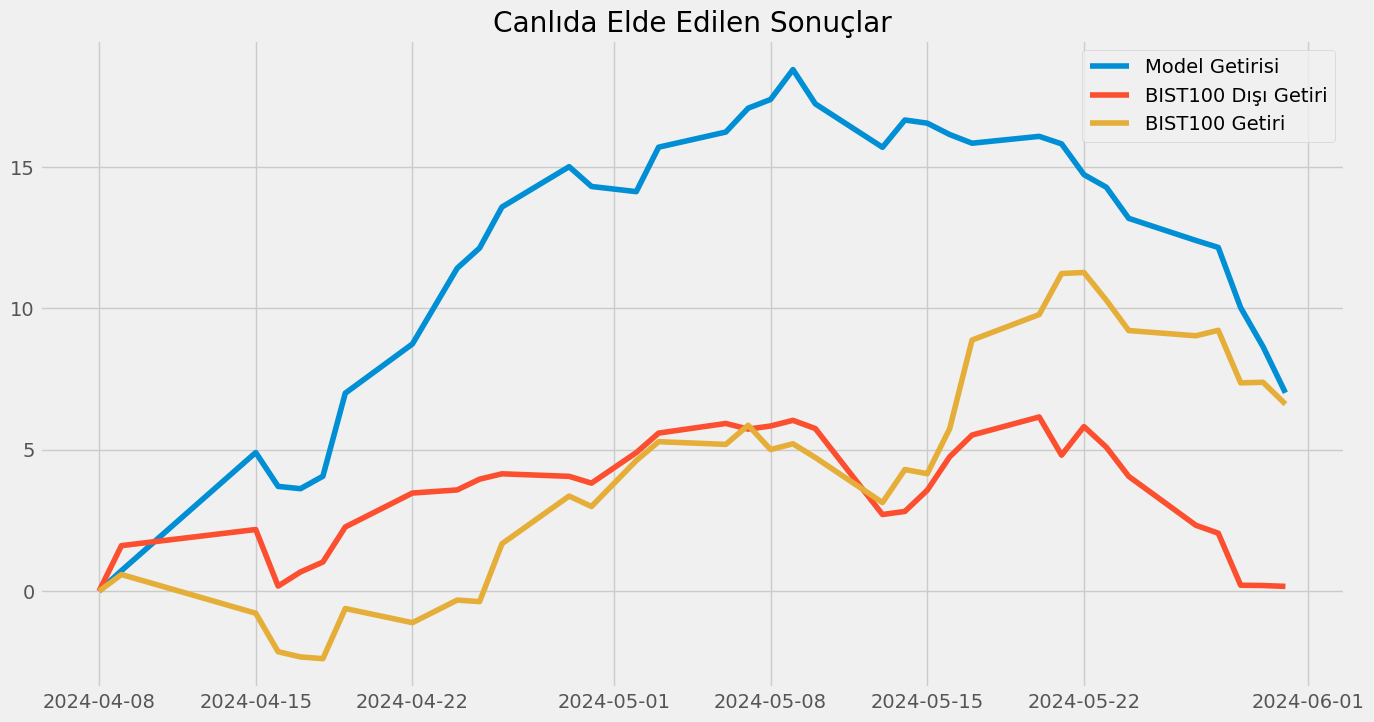

In [177]:
trade=pd.read_excel("./excel/trade.xlsx")
sonuclar=trade[["Kar(%).1","Endeks(%)"]].dropna()
sonuclar=sonuclar.set_index(yf.download(tickers="XU100.IS",start="2024-04-08").index)
endeks=yf.download(tickers="XU100.IS",start="2024-04-08")
endeks["Getiri"]=100*((endeks["Adj Close"]/endeks["Adj Close"].shift(1))-1)
endeks["Getiri"]=endeks["Getiri"].fillna(0)


import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,8))
plt.title("Canlıda Elde Edilen Sonuçlar")
plt.plot(sonuclar["Kar(%).1"].cumsum(),label="Model Getirisi")
plt.plot(sonuclar["Endeks(%)"].cumsum(),label="BIST100 Dışı Getiri")
plt.plot(endeks["Getiri"].cumsum(),label="BIST100 Getiri")
plt.legend()